In [ ]:
import pandas as pd
#import plotly.graph_objects as go
import numpy as np
from scipy import signal
import glob
import os
import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as md
import numpy as np
import datetime as dt
import time

df = pd.read_csv('1589734547-1589734613.csv', names = ['x', 'y', 'z','c'])
timesplit = os.path.basename('1589734547-1589734613.csv')
timesplit = timesplit[:-4]
start,end = timesplit.split('-')
start = int(start)
end = int(end)


In [ ]:
# import os
# import pandas as pd
  
# # assign path
# path, dirs, files = next(os.walk("/content/drive/MyDrive/tractian/Coletas-Geladeira/"))
# file_count = len(files)
# # create empty list
# dataframes_list = []
# filename_list = []

  
# # append datasets to the list 
# for i in range(file_count):
#     temp_df = pd.read_csv("/content/drive/MyDrive/tractian/Coletas-Geladeira/"+files[i], names = ['x', 'y', 'z','c'])
#     dataframes_list.append(temp_df)
      
# # display datsets
# for dataset in dataframes_list:
#     display(dataset)


# for i in range(file_count):
#     tempnames = os.path.basename("/content/drive/MyDrive/tractian/Coletas-Geladeira/"+files[i])
#     tempnames = tempnames[:-4]
#     # start,end = tempnames.split('-')
#     # start = int(start)
#     # end = int(end)
#     filename_list.append(tempnames)

# start = []
# end = [] 

# # for x in filename_list:
# #   start[x],end[x] = .split('-')

# start = [i.split('-')[0] for i in filename_list] 
# end = [i.split('-')[1] for i in filename_list] 
# startint = [ int(x) for x in start ]
# endint = [ int(y) for y in end ]



    

In [ ]:
# n = [i.shape[0] for i in dataframes_list]


When analyzing vibration data in the time domain (acceleration/vibration amplitude plotted against time) we’re limited to a few parameters in quantifying the strength of a vibration profile: amplitude, peak-to-peak value, and RMS.

Index(['x', 'y', 'z', 'c'], dtype='object')


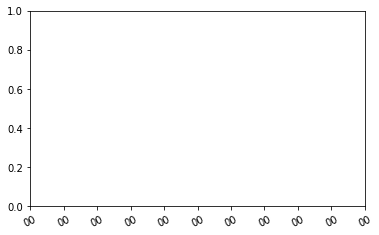

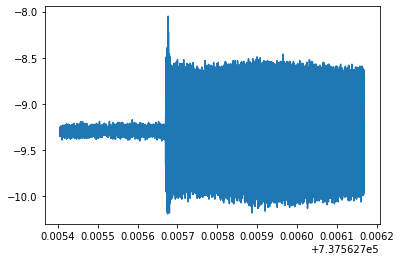

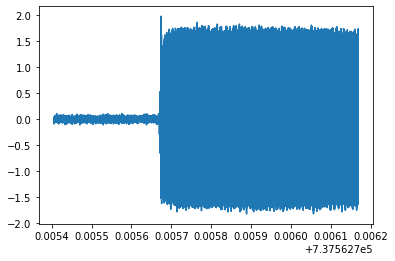

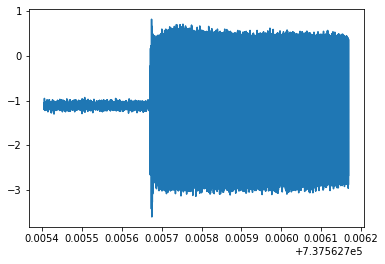

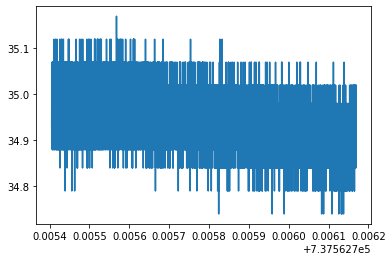

In [ ]:

# n = 12727
n = 12760
print(df.columns)

timestamps=np.linspace(start,end,n)
dates=[dt.datetime.fromtimestamp(ts) for ts in timestamps]
datenums=md.date2num(dates)
plt.subplots_adjust(bottom=0.2)
plt.xticks( rotation=25 )
ax=plt.gca()
xfmt =  md.DateFormatter('%S')
ax.xaxis.set_major_formatter(xfmt)
ax.xaxis_date()

for i in df.columns:
    plt.figure(i)
    plt.plot(datenums,df[i])

    
plt.show()

In [ ]:
xfmt

In [ ]:
datenums.shape


(12763,)

In [ ]:
df['Time']=pd.Series(datenums)
df = df.set_index('Time')
df

x     y     z      c
Time                                  
737562.705405 -9.33 -0.02 -1.06  34.93
737562.705405 -9.25  0.01 -1.07  34.98
737562.705405 -9.27  0.00 -1.20  34.93
737562.705405 -9.33  0.01 -1.18  34.98
737562.705405 -9.28  0.03 -1.08  34.98
...             ...   ...   ...    ...
737562.706169 -9.93 -1.54 -1.60  34.88
737562.706169 -9.75 -1.12  0.25  34.93
737562.706169 -8.88  0.64  0.37  34.88
737562.706169 -8.76  1.74 -0.94  34.93
737562.706169 -9.14  0.66 -2.67  35.02

[12760 rows x 4 columns]

In [ ]:
df

x     y     z      c           Time
0     -9.33 -0.02 -1.06  34.93  737562.705405
1     -9.25  0.01 -1.07  34.98  737562.705405
2     -9.27  0.00 -1.20  34.93  737562.705405
3     -9.33  0.01 -1.18  34.98  737562.705405
4     -9.28  0.03 -1.08  34.98  737562.705405
...     ...   ...   ...    ...            ...
12755 -9.93 -1.54 -1.60  34.88  737562.706169
12756 -9.75 -1.12  0.25  34.93  737562.706169
12757 -8.88  0.64  0.37  34.88  737562.706169
12758 -8.76  1.74 -0.94  34.93  737562.706169
12759 -9.14  0.66 -2.67  35.02  737562.706169

[12760 rows x 5 columns]

In [ ]:
df

x     y     z      c
Time                                  
737562.705405 -9.33 -0.02 -1.06  34.93
737562.705405 -9.25  0.01 -1.07  34.98
737562.705405 -9.27  0.00 -1.20  34.93
737562.705405 -9.33  0.01 -1.18  34.98
737562.705405 -9.28  0.03 -1.08  34.98
...             ...   ...   ...    ...
737562.706169 -9.93 -1.54 -1.60  34.88
737562.706169 -9.75 -1.12  0.25  34.93
737562.706169 -8.88  0.64  0.37  34.88
737562.706169 -8.76  1.74 -0.94  34.93
737562.706169 -9.14  0.66 -2.67  35.02

[12760 rows x 4 columns]

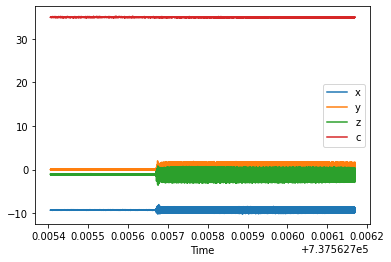

In [ ]:
df.plot()

In [ ]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np
from scipy import signal

In [ ]:
def fig_from_df(df):
    fig = go.Figure()
    for col in df.columns:
      fig.add_trace(go.Scatter(x=df.index,y=df[col],name=col))
    return fig

In [ ]:
fig = fig_from_df(df)
fig.write_html('time-history.html',full_html=False,include_plotlyjs='cdn')
fig.show()

In [ ]:
def get_psd(df,bin_width):
  fs = len(df)/(df.index[-1]-df.index[0])
  f, psd = signal.welch(df.to_numpy(), 
                        fs=fs, 
                        nperseg=fs/bin_width,
                        window='hanning',
                        axis=0
                        )

  df_psd = pd.DataFrame(psd,columns=df.columns)
  df_psd.columns
  df_psd['Frequency (Hz)'] = f
  return df_psd.set_index('Frequency (Hz)')

In [ ]:
psd = get_psd(df,1.0)
psd

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning:

nperseg = 16703998 is greater than input length  = 12760, using nperseg = 12760



x             y             z             c
Frequency (Hz)                                                        
0.000000e+00    7.772533e-10  4.290834e-09  5.026334e-10  6.027454e-10
1.309091e+03    3.435455e-09  1.193469e-08  1.574084e-08  1.493037e-07
2.618182e+03    4.215683e-09  9.949739e-09  1.671004e-08  9.375066e-09
3.927272e+03    1.212656e-09  4.496961e-09  7.159638e-09  1.242324e-09
5.236363e+03    2.264939e-10  5.213265e-10  6.829685e-09  1.005079e-09
...                      ...           ...           ...           ...
8.346763e+06    8.295311e-10  2.754947e-09  1.288756e-08  2.175021e-10
8.348072e+06    1.495846e-09  9.835481e-09  8.174598e-09  5.079207e-11
8.349381e+06    4.358762e-10  7.934046e-09  2.941323e-09  6.561205e-10
8.350690e+06    6.462473e-11  7.089266e-10  3.500691e-09  5.010004e-10
8.351999e+06    2.607010e-12  1.251886e-10  2.094198e-09  1.063865e-11

[6381 rows x 4 columns]

In [ ]:
def get_psd_plot(df_psd):
  fig = fig_from_df(df_psd.iloc[1:])
  fig.update_xaxes(type="log",title_text="Frequency (Hz)")
  fig.update_yaxes(type="log",title_text="Acceleration (m/s^2)")
  return fig

In [ ]:
fig = get_psd_plot(psd)
fig.show()

In [ ]:
def rms_from_psd(df_psd):
    d_f = df_psd.index[1] - df_psd.index[0]
    df_rms = df_psd.copy()
    df_rms = df_rms*d_f
    df_rms = df_rms.cumsum()
    return(df_rms**0.5)

df_rms = rms_from_psd(psd)
fig = fig_from_df(df_rms)
fig.update_xaxes(type="log",title_text="Frequency (Hz)")
fig.update_yaxes(title_text="Acceleration gRMS")

fig.write_html('cum-rms.html',full_html=False,include_plotlyjs='cdn')
df_rms.to_csv('cum-rms.csv')

fig.show()

The RMS (root mean square) value is generally the most useful because it is directly related to the energy content of the vibration profile and thus the destructive capability of the vibration. RMS also takes into account the time history of the wave form. 

In [ ]:
def build_oct(start,stop,space):
    a = [start]
    while a[-1] < stop:
        a = np.append(a,[a[-1]*(2**space)])
    df = pd.DataFrame(a,columns=['Frequency (Hz)'])
    df['Lower'] = df['Frequency (Hz)']/(2**(space/2))
    df['Upper'] = df['Frequency (Hz)']*(2**(space/2))
    df['Upper'][df['Upper']>stop]=stop
    df['Frequency (Hz)'][df['Frequency (Hz)']>stop]=stop
    df = df.set_index('Frequency (Hz)')
    return df[df['Lower']<stop]

def add_oct_psd(df_psd,df_oct):
    df_oct_psd = df_oct.drop(['Lower','Upper'], axis=1).copy()
    for name in df_psd.columns:
        df_oct_psd[name]=np.nan
    df_oct_rms = df_oct_psd.copy()
    f_step = df_psd.index[1]-df_psd.index[0]
    for i in range(df_oct.shape[0]):
        f_l = df_oct['Lower'].iloc[i]
        f_u = df_oct['Upper'].iloc[i]
        for j in df_psd.columns:
            d_t = df_psd[j][(df_psd.index>=f_l) & (df_psd.index<f_u)]
            d_t = d_t*f_step
            df_oct_psd[j].iloc[i] = d_t.sum()/(f_u-f_l)
            df_oct_rms[j].iloc[i] = d_t.sum()
    return df_oct_psd, df_oct_rms.cumsum()**0.5

In [ ]:
fs = len(df)/(df.index[-1]-df.index[0])

df_oct = build_oct(1,fs/2,1/3)            
df_oct_psd,df_oct_rms = add_oct_psd(psd,df_oct)    

# Get Rid of Values Equal to 0
df_oct_psd = df_oct_psd[(df_oct_psd > 0).any(axis=1)]

get_psd_plot(df_oct_psd).show()

In [ ]:
df

x     y     z      c
Time                                  
737562.065949 -9.58 -0.92 -2.36  47.31
737562.065949 -9.67 -1.35 -1.72  47.40
737562.065949 -9.42 -0.38 -0.88  47.31
737562.065949 -9.08  1.30  0.26  47.35
737562.065949 -9.02  1.30 -0.38  47.35
...             ...   ...   ...    ...
737562.066470 -9.22  0.20 -0.38  47.40
737562.066470 -9.04  1.58  0.35  47.49
737562.066470 -8.96  0.96 -0.77  47.45
737562.066470 -9.53 -0.51 -2.03  47.54
737562.066470 -9.66 -1.53 -2.37  47.40

[12763 rows x 4 columns]

In [ ]:
df

x     y     z
Time                           
737562.065949 -9.58 -0.92 -2.36
737562.065949 -9.67 -1.35 -1.72
737562.065949 -9.42 -0.38 -0.88
737562.065949 -9.08  1.30  0.26
737562.065949 -9.02  1.30 -0.38
...             ...   ...   ...
737562.066470 -9.22  0.20 -0.38
737562.066470 -9.04  1.58  0.35
737562.066470 -8.96  0.96 -0.77
737562.066470 -9.53 -0.51 -2.03
737562.066470 -9.66 -1.53 -2.37

[12763 rows x 3 columns]

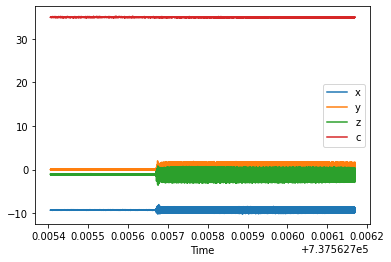

In [ ]:
df.plot()

In [ ]:
get_psd_plot(get_psd(df,10.0)).show()

/usr/local/lib/python3.7/dist-packages/scipy/signal/spectral.py:1966: UserWarning:

nperseg = 1670399 is greater than input length  = 12760, using nperseg = 12760



A power spectral density (PSD) takes the amplitude of the FFT, multiplies it by its complex conjugate and normalizes it to the frequency bin width.  This allows for accurate comparison of random vibration signals that have different signal lengths.  For this reason, PSDs are typically used to describe random vibration environments like those specified in military and commercial test standards. 

In [ ]:
from scipy.fft import fft, fftfreq

def get_fft(df):
    N=len(df)
    fs = len(df)/(df.index[-1]-df.index[0])
    
    x_plot= fftfreq(N, 1/fs)[:N//2]
    
    df_fft = pd.DataFrame()
    df_phase = pd.DataFrame()
    for name in df.columns:
        yf = fft(df[name].values) 
        y_plot= 2.0/N * np.abs(yf[0:N//2])
        
        '''
        phase = np.unwrap(2 * np.angle(yf)) / 2 * 180/np.pi
        df_phase = pd.concat([df_phase,
                            pd.DataFrame({'Frequency (Hz)':x_plot[1:],
                                          name:phase[1:n]}).set_index('Frequency (Hz)')],axis=1)
        '''
        df_fft = pd.concat([df_fft,
                            pd.DataFrame({'Frequency (Hz)':x_plot[1:],
                                          name:y_plot[1:]}).set_index('Frequency (Hz)')],axis=1)
    
    return df_fft

In [ ]:
fig_from_df(get_fft(df)).show()

The use of an FFT in our vibration analysis gave clues on what was causing the measured vibration.

Unbalance is the most fundamental fault that causes vibrations in rotating equipment.
Unbalance occurs when the mass distribution of the rotor is asymmetric with respect to the
axis centerline, and all the causes of unbalance exist to some degree in the rotors. Excessive
unbalance increases the vibrations and noise of the rotating equipment. As a result, fatigue
destruction may occur due to a deterioration of the bearings and consumable parts.
Misalignment is one of the most common faults of rotating equipment along with
unbalancing, and refers to a condition where the centers of the two axes do not
coincide, or a condition where the centers coincide but are not parallel. A large degree of
misalignment can cause overheating of the coupling, an increase in the shaft cracks and
fatigue, and damage to the bearings and consumable parts.
A rubbing fault is a secondary transient phenomenon caused by excessive unbalance
and misalignment in rotating machinery. Rubbing may be caused by the occurrence
of friction between the stator and rotor caused by excessive vibrations, or a narrow gap
due to thermal expansion during equipment operation. Continuous rubbing during the
operation of rotating machinery may cause the separation of parts or axis bending, and
severe rubbing can lead to the destruction of the rotating equipment

On analysing the fft and psd graphs we find that the refridgerator seems to be misaligned

https://www.researchgate.net/publication/349183571_A_Study_on_Deep_Learning_Application_of_Vibration_Data_and_Visualization_of_Defects_for_Predictive_Maintenance_of_Gravity_Acceleration_Equipment